In [1]:
pwd

u'/Users/lia/dev/code-coffee'

In [2]:
ls

FeL_xsect.dat  README.md      demo.ipynb


In [3]:
import numpy as np

In [4]:
x = np.array([1,2,3,4])

In [5]:
y = 2.*x

In [6]:
print(y)

[ 2.  4.  6.  8.]


In [7]:
x2 = [1,2,3,4]

In [8]:
d = {'a':1, 'b':2, 10.123:'c'}

In [9]:
import matplotlib.pyplot as plt

%matplotlib inline

In [10]:
%%timeit
x = np.linspace(0,100,201)

The slowest run took 8.54 times longer than the fastest. This could mean that an intermediate result is being cached 
100000 loops, best of 3: 5.39 µs per loop


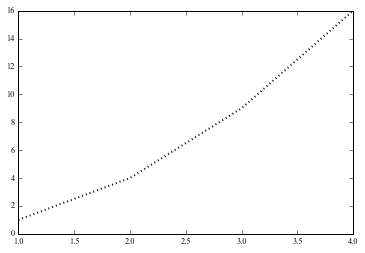

In [11]:
plt.plot(x, x**2, 'k:', lw=2)

In [12]:
from astropy.io import ascii

//anaconda/lib/python2.7/site-packages/IPython/kernel/__init__.py:13: ShimWarning: The `IPython.kernel` package has been deprecated. You should import from ipykernel or jupyter_client instead.
  "You should import from ipykernel or jupyter_client instead.", ShimWarning)


In [13]:
data = ascii.read('FeL_xsect.dat')

In [14]:
data.colnames

['wavel(angs)',
 'energy(keV)',
 'xsect_ext(1.e22)',
 'xsect_sca(1.e22)',
 'xsect_abs(1.e22)']

In [15]:
wavel = data['wavel(angs)']
xs_ext = data['xsect_ext(1.e22)']

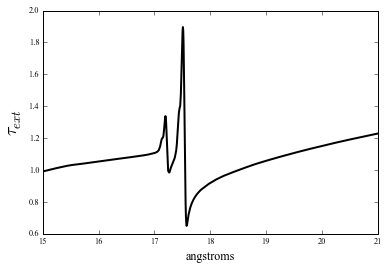

In [16]:
plt.plot(wavel, xs_ext, 'k-', lw=2)
plt.xlabel("angstroms")
plt.ylabel(r"$\tau_{ext}$", size=18)

Here is some example text

$$ a = b^{-24} $$

In [17]:
class Xsect(object):
    def __init__(self, filename):
        data = ascii.read(filename)
        self.wavel = data['wavel(angs)']
        self.energy = data['energy(keV)']
        self.ext    = data['xsect_ext(1.e22)']
        
    @property
    def mean(self):
        return np.mean(self.ext)
    
    def plot(self, ax, **kwargs):
        ax.plot(self.wavel, self.ext, **kwargs)
        ax.tick_params(labelsize=12)
        ax.set_xlabel('Wavelength[angs]')
        ax.set_ylabel(r'$\tau_{ext}$')
        return 
    
    def rshift(self, z):
        self.wavel *= (1+z)
        self.energy *= 1.0/(1+z)
        return

In [18]:
FeL = Xsect('FeL_xsect.dat')

In [19]:
FeL.mean

1.0739813501599145

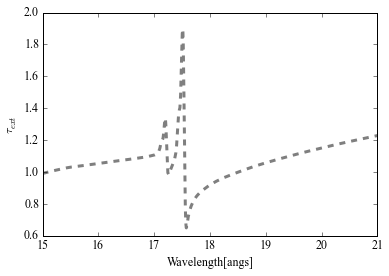

In [20]:
ax = plt.subplot(111)
FeL.plot(ax, color='k', ls='--', lw=3, alpha=0.5)

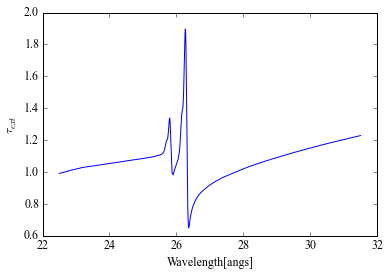

In [21]:
FeL.rshift(0.5)

ax = plt.subplot(111)
FeL.plot(ax)

In [22]:
def myfunction(x, y, *args, **kwargs):
    plt.plot(x, y, *args, **kwargs)

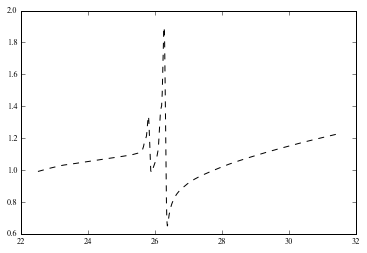

In [23]:
myfunction(FeL.wavel, FeL.ext, color='k', ls='--')